# Face Recognition using VGG16 and SIFT descriptors
based on paper: Face Recognition Using the SR-CNN Model

# Import libraries

In [18]:

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

import cv2

import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from datetime import datetime
import io
import itertools
from packaging import version



from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

import sklearn.metrics
from tensorflow.keras.optimizers import SGD
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE


In [2]:
def normalize_mean_var(arr):
    arr -= np.mean(arr)
    arr /= np.var(arr)
    return arr

# Loading data

In [3]:
ritf_hist_train_path = "npy_saves/RITF_hist_reduced_128_train_imc_50.npy"
ritf_hist_valid_path = "npy_saves/RITF_hist_reduced_128_valid_imc_50.npy"

X_traing_hists_reduced = np.load(ritf_hist_train_path)
X_valid_hists_reduced = np.load(ritf_hist_valid_path)

In [4]:
y_train_path = "npy_saves/y_train_imc_50.npy"
y_valid_path = "npy_saves/y_valid_imc_50.npy"

y_training = np.load(y_train_path)
y_validation = np.load(y_valid_path)

In [5]:
traing_data_sift_hist = np.load('npy_saves/sift_hist_50m_4k_training.npy')
valid_data_sift_hist = np.load('npy_saves/sift_hist_50m_4k_validation.npy')

In [6]:
cnn_train_path = "npy_saves/cnn_train_imc_50.npy"
cnn_valid_path = "npy_saves/cnn_valid_imc_50.npy"


cnn_train = np.load(cnn_train_path)
cnn_valid = np.load(cnn_valid_path)

# Merging data

In [7]:
def norm_merge(arr1, arr2, alpha):
    a = normalize_mean_var(arr1.astype(np.float32)) * alpha
    b = normalize_mean_var(arr2.astype(np.float32)) * (1-alpha)
    return np.hstack((a, b))

training_data_SR = norm_merge(X_traing_hists_reduced, traing_data_sift_hist, 0.42)
validation_data_SR = norm_merge(X_valid_hists_reduced, valid_data_sift_hist, 0.42)



In [8]:
training_data = norm_merge(training_data_SR, cnn_train, 0.45)
validation_data = norm_merge(validation_data_SR, cnn_valid, 0.45)

# Training

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(model, X_test, y_test, title):
    disp = plot_confusion_matrix(model, X_test, y_test,
                                cmap=plt.cm.Blues,
                                normalize='true')
    disp.ax_.set_title('Confusion matrix: ' + title)

In [10]:
def Linear_SVM_classification(X_train, X_test, y_train, y_test):
    #LinearSVC
    from sklearn.svm import LinearSVC

    svc= LinearSVC(C=100.0, random_state=42, max_iter=1000, verbose=1)
    svc.fit(X_train, y_train)

    svcpred = svc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
    SVC_acc = metrics.accuracy_score(y_test, svcpred)

    print('Linear SVC accuracy: {}'.format(SVC_acc))
    return SVC_acc
        


In [11]:
Linear_SVM_classification(cnn_train, cnn_valid, y_training, y_validation)

[LibLinear]Linear SVC accuracy: 0.9772727272727273


0.9772727272727273

In [12]:
Linear_SVM_classification(training_data_SR, validation_data_SR, y_training, y_validation)

[LibLinear]Linear SVC accuracy: 0.9253246753246753


0.9253246753246753

In [19]:
results = []
for i in range(1, 101):
    alpha = i / 100
    print("alpha = ", alpha)
    training_data = norm_merge(cnn_train, training_data_SR, alpha)
    validation_data = norm_merge(cnn_valid, validation_data_SR, alpha)
    acc = Linear_SVM_classification(training_data, validation_data, y_training, y_validation)
    results.append(acc)

alpha =  0.01
[LibLinear]Linear SVC accuracy: 0.9253246753246753
alpha =  0.02
[LibLinear]Linear SVC accuracy: 0.9448051948051948
alpha =  0.03
[LibLinear]Linear SVC accuracy: 0.961038961038961
alpha =  0.04
[LibLinear]Linear SVC accuracy: 0.9772727272727273
alpha =  0.05
[LibLinear]Linear SVC accuracy: 0.9772727272727273
alpha =  0.06
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.07
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.08
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.09
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.1
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.11
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.12
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.13
[LibLinear]Linear SVC accuracy: 0.9805194805194806
alpha =  0.14
[LibLinear]Linear SVC accuracy: 0.9772727272727273
alpha =  0.15
[LibLinear]Linear SVC accuracy: 0.9772727272727273
alpha =  0.16
[LibLinear]Li

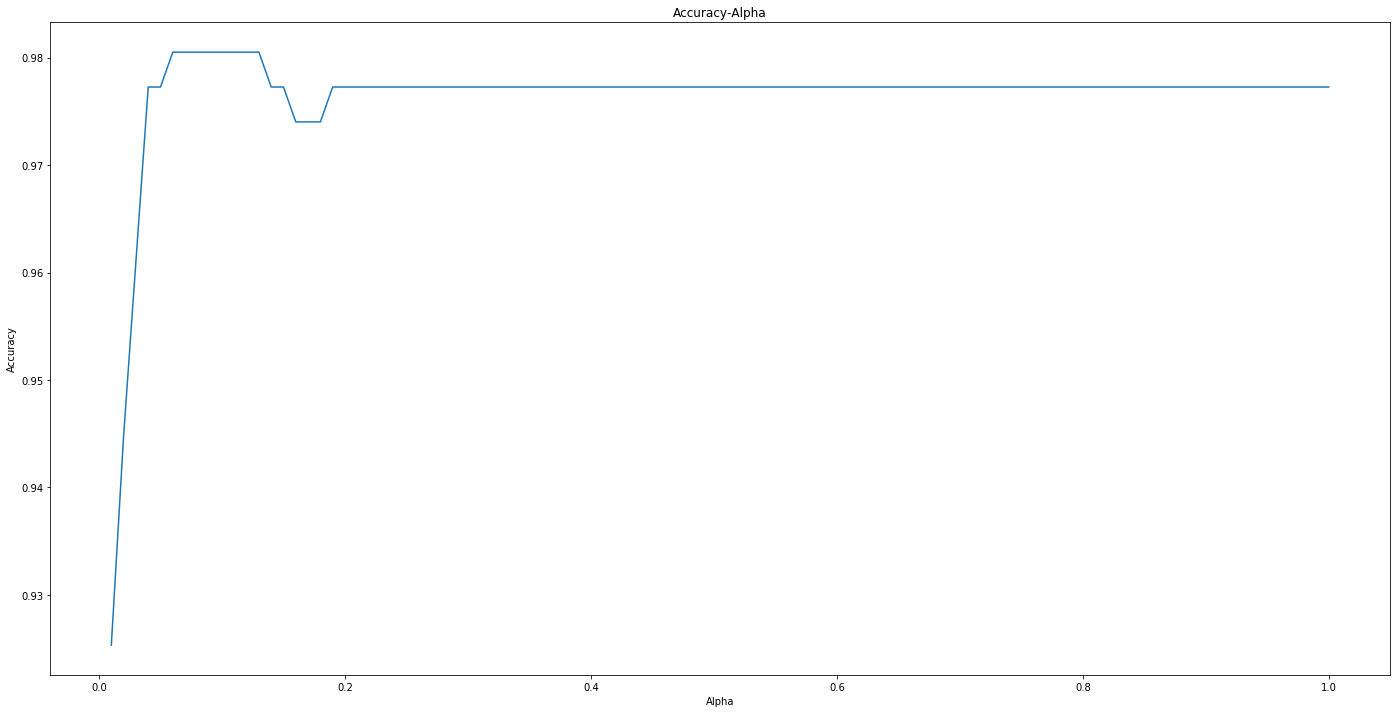

Max accuracy at alpha = 0.06 with accuracy of 0.9805194805194806


In [30]:
import matplotlib.pyplot as plt
def show_plot(x_data, y_data, x_label, y_label, title):
    plt.subplots(figsize=(12*2, 12))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.show()
    
show_plot([i/100 for i in range(1, 101)], results, 'Alpha', 'Accuracy', 'Accuracy-Alpha')

def get_max_alpha(arr):
    max_a = 0
    max_acc = 0
    for i, acc in enumerate(arr):
        if acc > max_acc:
            max_a = (i+1) / 100
            max_acc = acc
    return max_a, max_acc
            
alp_acc = get_max_alpha(results)
print("Max accuracy at alpha = {} with accuracy of {}".format(alp_acc[0], alp_acc[1]))

In [13]:
alpha = 0.09
training_data = norm_merge(cnn_train, training_data_SR, alpha)
validation_data = norm_merge(cnn_valid, validation_data_SR, alpha)
acc = Linear_SVM_classification(training_data, validation_data, y_training, y_validation)

[LibLinear]Linear SVC accuracy: 0.9805194805194806


In [25]:
training_data.shape[1]

6272

In [14]:
def get_selected_features(dataArr, trueValues):
    res = []
    for i, v in enumerate(dataArr):
        if trueValues[i]:
            res.append(v)
    return np.asarray(res)

def get_selected_features_mat(dataMat, trueValues):
    res = []
    for v in dataMat:
        res.append(get_selected_features(v, trueValues))
    return res
        


In [15]:
def SVM_classification(X_train, X_test, y_train, y_test):
    #LinearSVC
    from sklearn.svm import LinearSVC

    svc= LinearSVC(C=100.0, random_state=42, max_iter=1000, verbose=1)
    svc.fit(X_train, y_train)

    svcpred = svc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
    SVC_acc = metrics.accuracy_score(y_test, svcpred)

    return SVC_acc
        

In [26]:
# feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
accs = []
n_feat = []
for i in range(training_data.shape[1], 1, -128):

    estimator = LinearSVC(C=100.0, random_state=42, max_iter=1000)
    selector = RFE(estimator, n_features_to_select=i, step=0.1, verbose=1)
    selector = selector.fit(training_data, y_training)
    train_reduced = np.asarray(get_selected_features_mat(training_data, selector.support_))
    valid_reduced = np.asarray(get_selected_features_mat(validation_data, selector.support_))
    acc = SVM_classification(train_reduced, valid_reduced, y_training, y_validation)
    accs.append(acc)
    n_feat.append(i)
    print("features: {}, accuracy: {}".format(i, acc))


[LibLinear]features: 6272, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
[LibLinear]features: 6144, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
[LibLinear]features: 6016, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
[LibLinear]features: 5888, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
[LibLinear]features: 5760, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
Fitting estimator with 5645 features.
[LibLinear]features: 5632, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
Fitting estimator with 5645 features.
[LibLinear]features: 5504, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
Fitting estimator with 5645 features.
[LibLinear]features: 5376, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
Fitting estimator with 5645 features.
[LibLinear]features: 5248, accuracy: 0.9805194805194806
Fitting estimator with 6272 features.
Fi

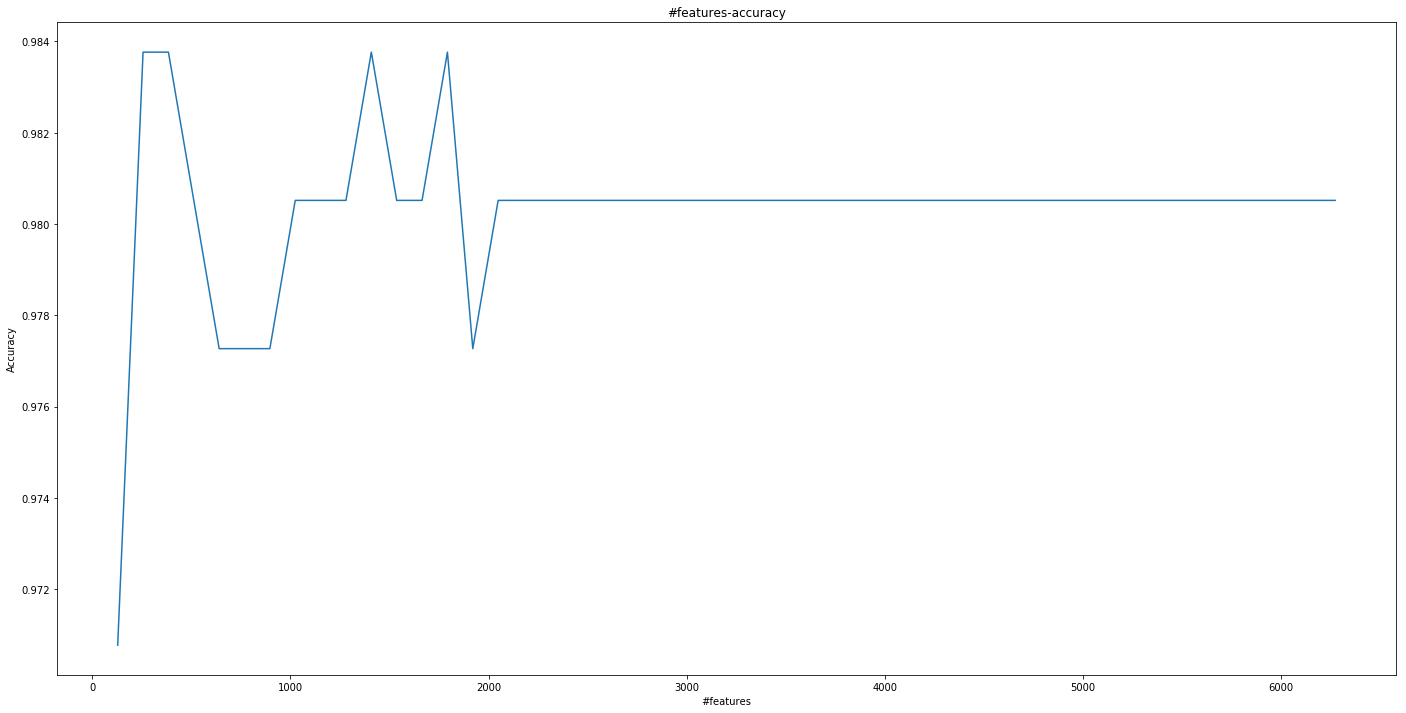

In [29]:
import matplotlib.pyplot as plt
def show_plot(x_data, y_data, x_label, y_label, title):
    plt.subplots(figsize=(12*2, 12))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.show()

show_plot(n_feat, accs, '#features', 'Accuracy', '#features-accuracy')


In [19]:

estimator = LinearSVC(C=100.0, random_state=42, max_iter=1000)
selector = RFE(estimator, n_features_to_select=256, step=0.1, verbose=1)
selector = selector.fit(training_data, y_training)
train_reduced = np.asarray(get_selected_features_mat(training_data, selector.support_))
valid_reduced = np.asarray(get_selected_features_mat(validation_data, selector.support_))
acc = SVM_classification(train_reduced, valid_reduced, y_training, y_validation)
acc

Fitting estimator with 6272 features.
Fitting estimator with 5645 features.
Fitting estimator with 5018 features.
Fitting estimator with 4391 features.
Fitting estimator with 3764 features.
Fitting estimator with 3137 features.
Fitting estimator with 2510 features.
Fitting estimator with 1883 features.
Fitting estimator with 1256 features.
Fitting estimator with 629 features.
[LibLinear]

0.9837662337662337

[LibLinear]

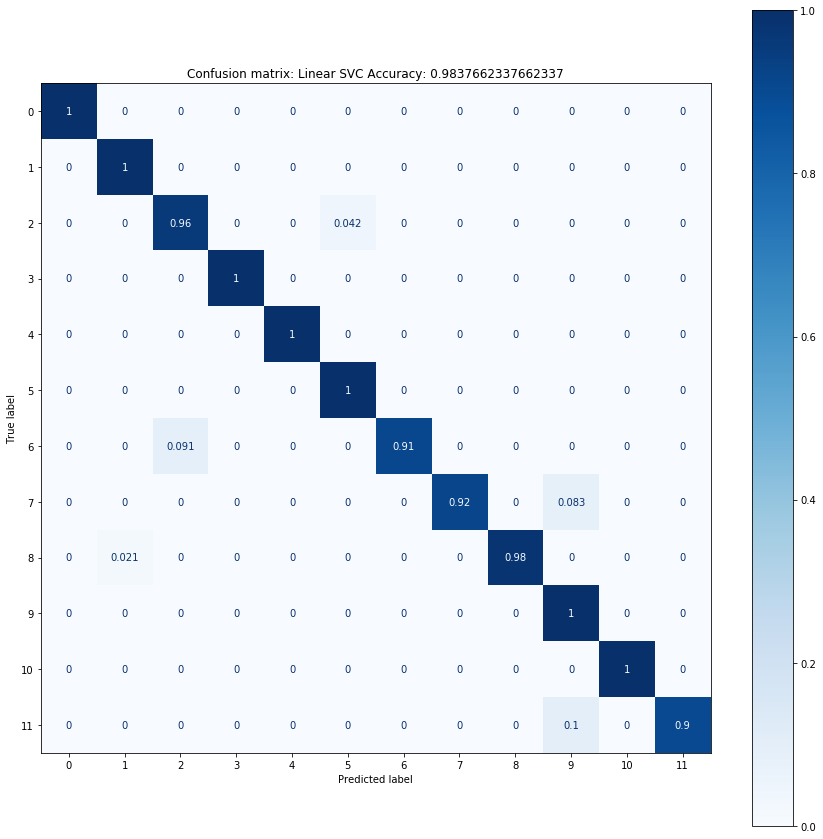

In [288]:
#LinearSVC
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix_clsf(model, X_test, y_test, title):
    fig = plt.figure(figsize=(15, 15))
    ax = plt.gca()
    disp = plot_confusion_matrix(model, X_test, y_test,
                                cmap=plt.cm.Blues,
                                normalize='true', ax=ax)
    disp.ax_.set_title('Confusion matrix: ' + title)
        
def Linear_SVM_classification(X_train, X_test, y_train, y_test):
    
        
    
    svc= LinearSVC(C=100.0, random_state=42, max_iter=1000, verbose=1)
    svc.fit(X_train, y_train)

    svcpred = svc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
    SVC_acc = metrics.accuracy_score(y_test, svcpred)
    confusion_matrix_clsf(svc, X_test, y_test, "Linear SVC Accuracy: {}".format(SVC_acc))
        
Linear_SVM_classification(train_reduced, valid_reduced, y_training, y_validation)

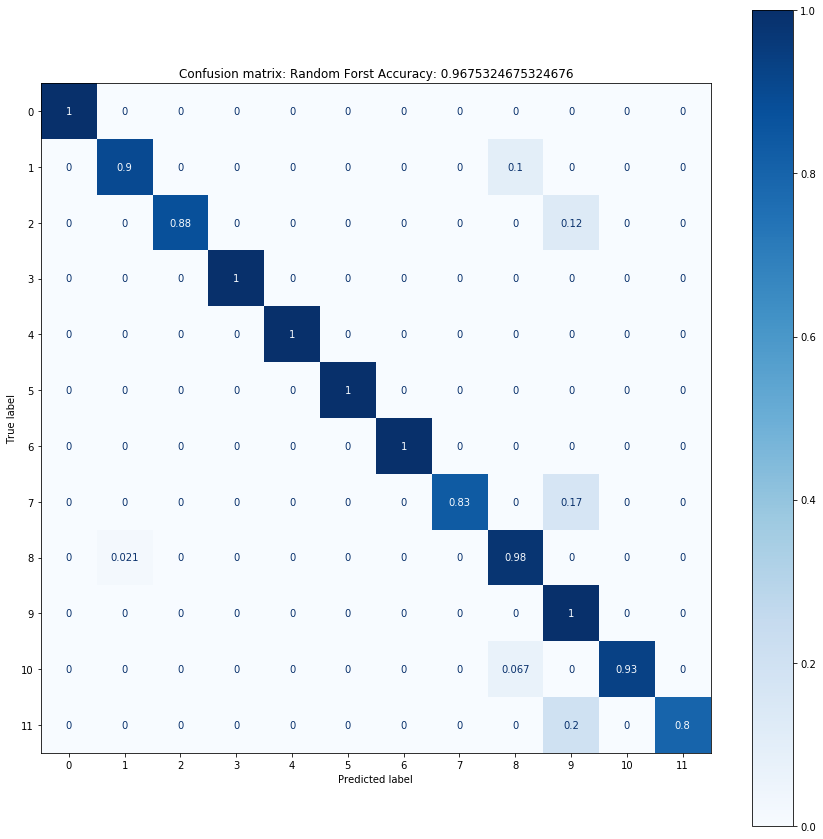

In [289]:
def RF_classification(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, pred)
    RF_acc = metrics.accuracy_score(y_test, pred)

    confusion_matrix_clsf(clf, X_test, y_test, "Random Forst Accuracy: {}".format(RF_acc))
    
RF_classification(train_reduced, valid_reduced, y_training, y_validation)

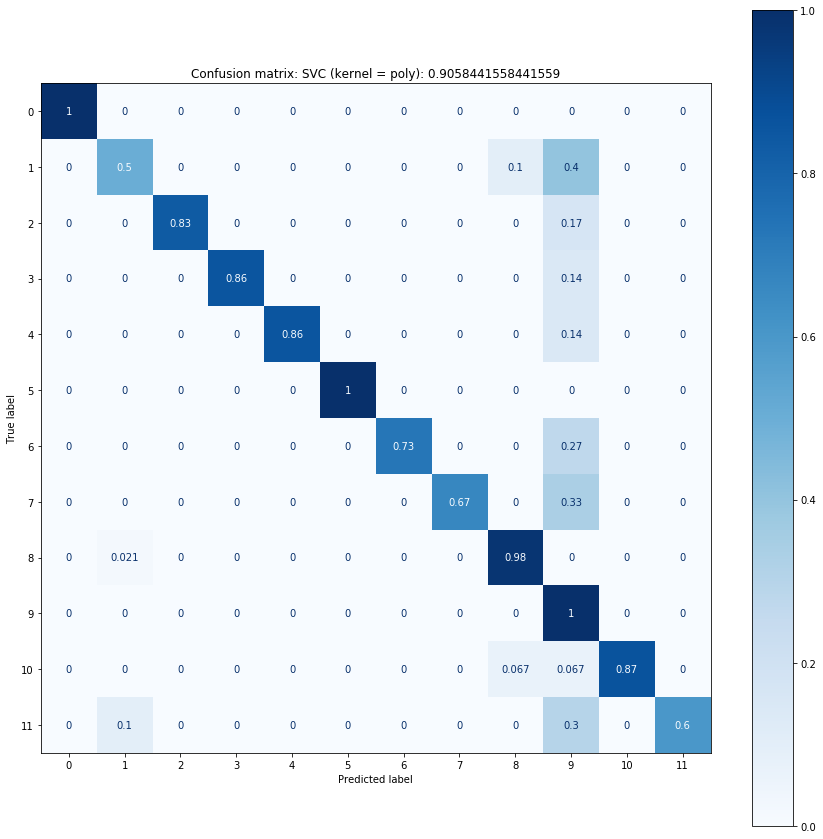

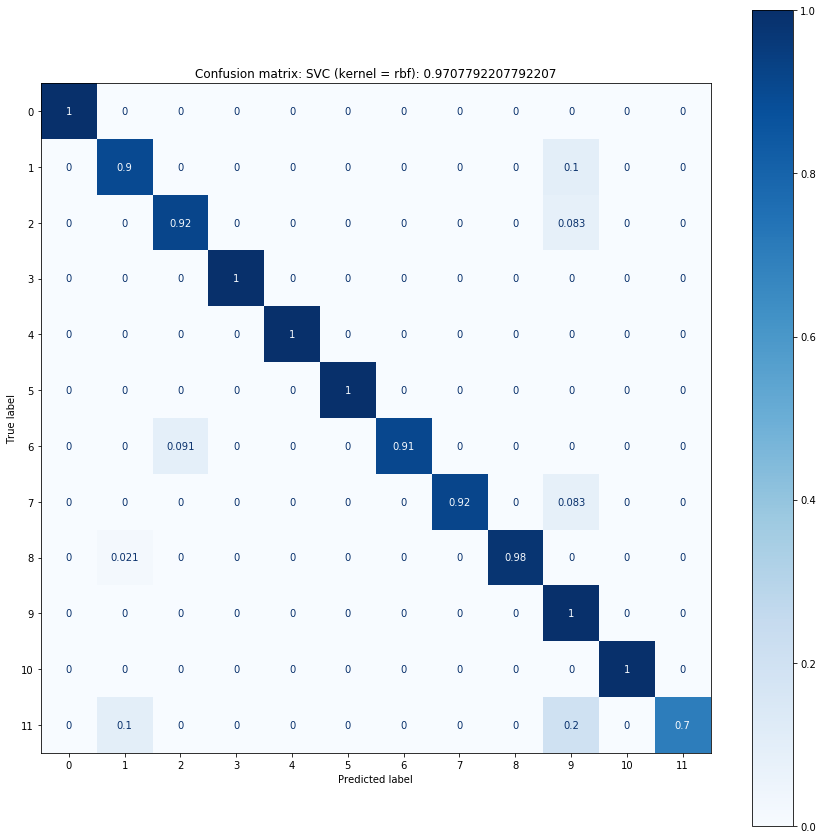

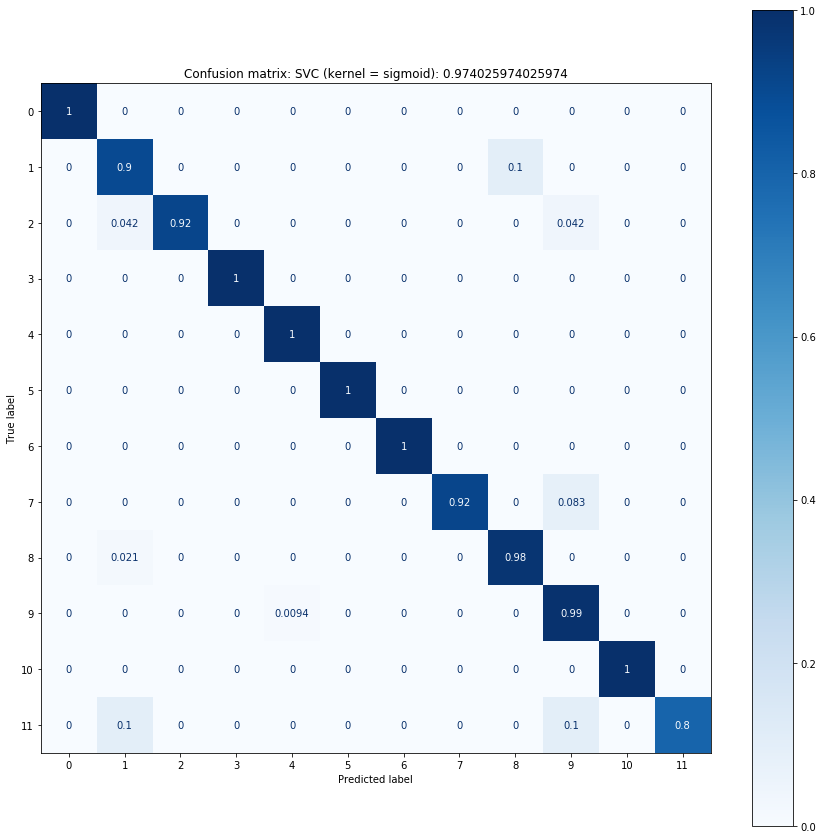

In [290]:
def SVM_classification(X_train, X_test, y_train, y_test):
    #SVM
    from sklearn.svm import SVC

    for kernel in ('poly', 'rbf', 'sigmoid'):
        svc= SVC(kernel = kernel)

        svc.fit(X_train, y_train)
        svcpred = svc.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
        SVC_acc = metrics.accuracy_score(y_test, svcpred)

        title = 'SVC (kernel = {}): {}'.format(kernel, SVC_acc)
        confusion_matrix_clsf(svc, X_test, y_test, title)
        
SVM_classification(train_reduced, valid_reduced, y_training, y_validation)

In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Activation, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, regularizers, utils
from tensorflow.keras import applications
from tensorflow.keras.losses import categorical_crossentropy,categorical_hinge,hinge,squared_hinge
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization , Input ,concatenate, PReLU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [39]:
n_classes = max(y_training) + 1
def convert_labels(labels):
    res = []
    for lbl in labels:
        outputs = [0] * n_classes
        outputs[lbl] = 1
        res.append(outputs)
    return np.asarray(res)

y_training_nn = convert_labels(y_training)
y_validation_nn = convert_labels(y_validation)

In [ ]:
(train_reduced, valid_reduced, y_training, y_validation)

In [41]:
train_reduced.shape[1]

256

In [236]:
# using tensorboard --logdir=path/to/logdir then ctrl+C to kill it in cmd
# SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
# I tested all of the optimizers above, SGD gave the highest accuracy

input_size = train_reduced.shape[1]
output_size =  max(y_training) + 1

dense_size = 1 + (input_size + output_size) // 2

model = Sequential()
model.add(Dense(dense_size,input_dim=input_size))
model.add(BatchNormalization())
model.add(PReLU(alpha_initializer='zero', weights=None, name = 'PReLU1'))

#model.add(Dropout(0.5))
model.add(Dense(dense_size // 2))
model.add(PReLU(alpha_initializer='zero', weights=None, name = 'PReLU2'))

#model.add(Dropout(0.5))
model.add(Dense(output_size, activation='softmax'))



optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=1e-03, amsgrad=True,
        name='Adam')

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


In [46]:
# checkpoint
filepath="Models\CNN_SIFT_RITF_Final_{val_accuracy:.5f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#checkpoint.best = 0.98
import datetime
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, profile_batch = 100000000)


#callbacks_list = [checkpoint, tensorboard_callback]
callbacks_list = [tensorboard_callback]


In [237]:
history = model.fit(train_reduced, y_training_nn, batch_size=8, epochs=100, validation_data = (valid_reduced, y_validation_nn))


Train on 1252 samples, validate on 308 samples
Epoch 1/100
1252/1252 [==============================] - 1s 1ms/sample - loss: 2.8353 - accuracy: 0.6917 - val_loss: 9.5467 - val_accuracy: 0.8019
Epoch 2/100
1252/1252 [==============================] - 1s 614us/sample - loss: 20.2962 - accuracy: 0.8275 - val_loss: 43.9527 - val_accuracy: 0.8734
Epoch 3/100
1252/1252 [==============================] - 1s 617us/sample - loss: 27.5723 - accuracy: 0.9010 - val_loss: 15.9927 - val_accuracy: 0.9513
Epoch 4/100
1252/1252 [==============================] - 1s 584us/sample - loss: 12.3792 - accuracy: 0.9633 - val_loss: 14.1296 - val_accuracy: 0.9545
Epoch 5/100
1252/1252 [==============================] - 1s 593us/sample - loss: 4.8631 - accuracy: 0.9792 - val_loss: 16.0298 - val_accuracy: 0.9545
Epoch 6/100
1252/1252 [==============================] - 1s 587us/sample - loss: 5.5565 - accuracy: 0.9824 - val_loss: 7.5505 - val_accuracy: 0.9773
Epoch 7/100
1252/1252 [==============================]

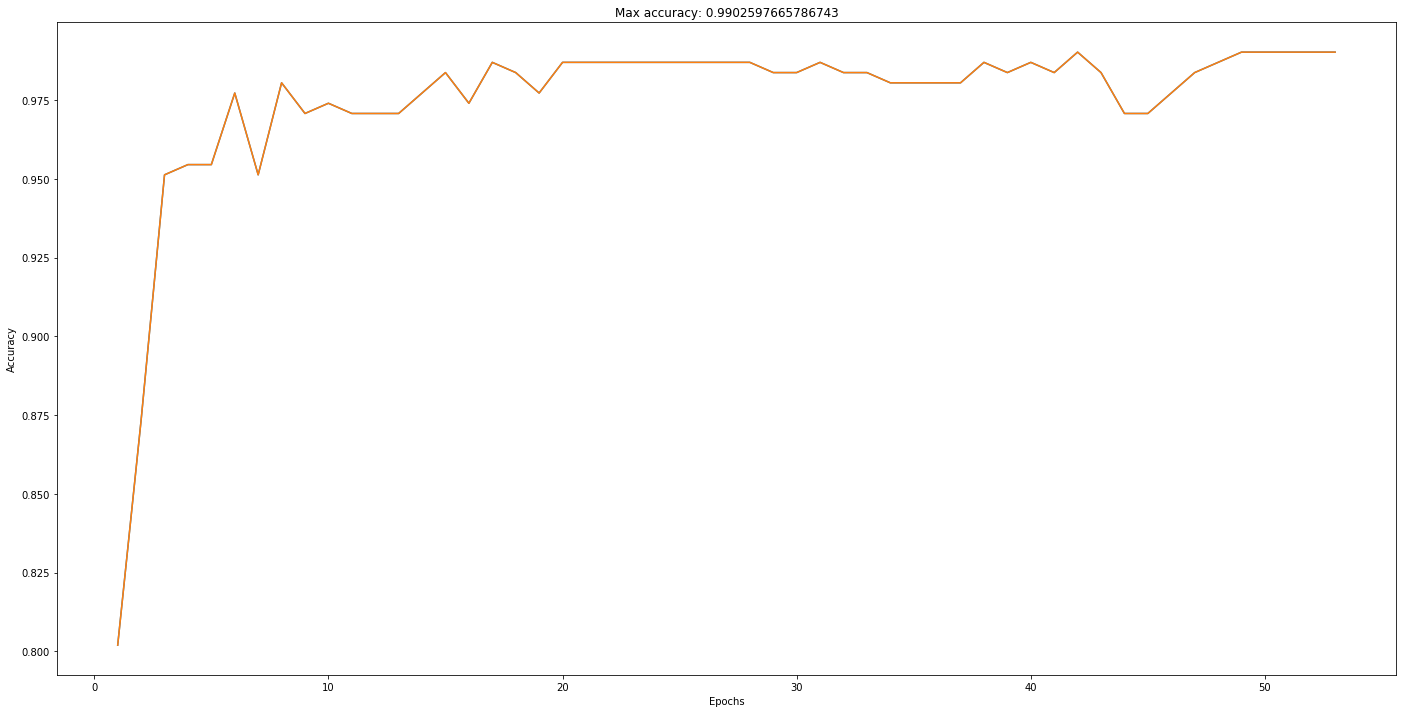

In [296]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def show_plot(x_data, y_data, x_label, y_label, title):
    plt.subplots(figsize=(12*2, 12))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data, y_data)
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.show()
    
acc = np.asarray(history.history['val_accuracy'][:53])

show_plot([i for i in range(1,len(acc)+1)], acc, 'Epochs', 'Accuracy', 'Max accuracy: {}'.format(max(acc)))


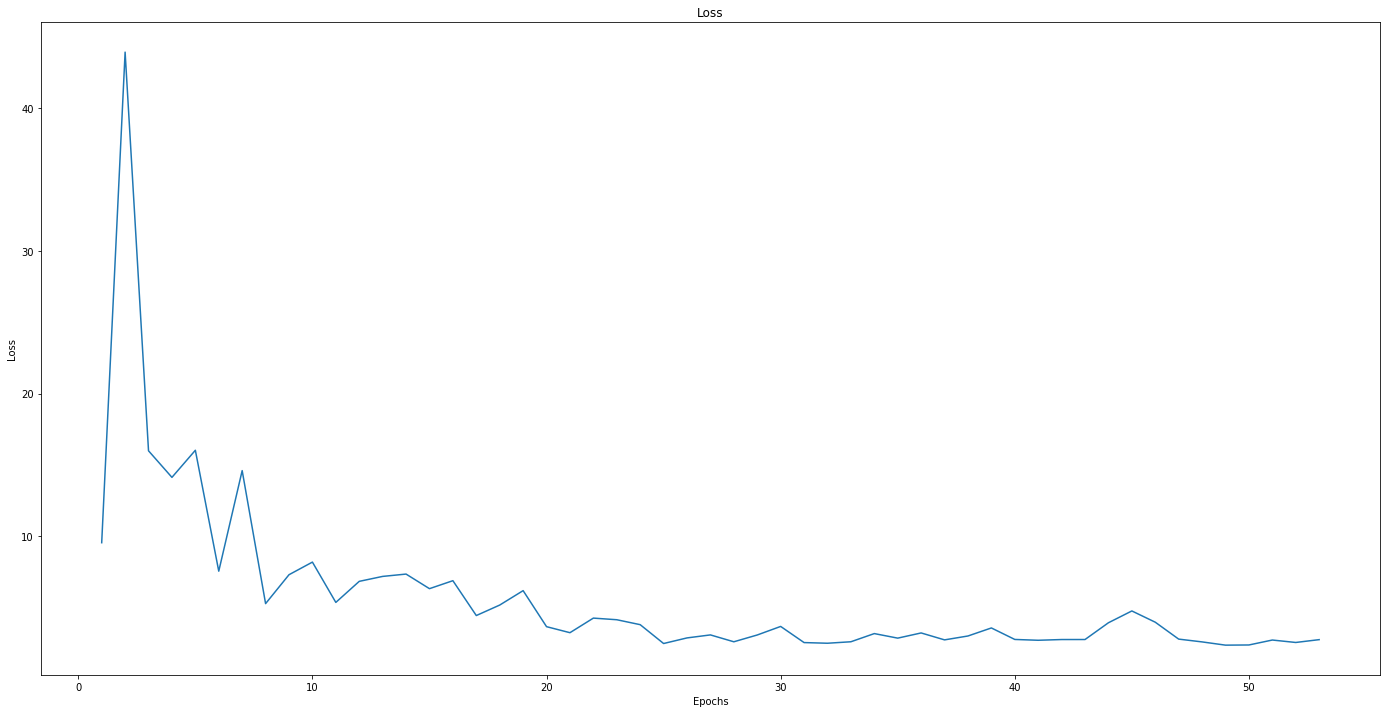

In [295]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def show_plot(x_data, y_data, x_label, y_label, title):
    plt.subplots(figsize=(12*2, 12))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.show()
    
loss = np.asarray(history.history['val_loss'][:53])

show_plot([i for i in range(1,len(acc)+1)], loss, 'Epochs', 'Loss', 'Loss')


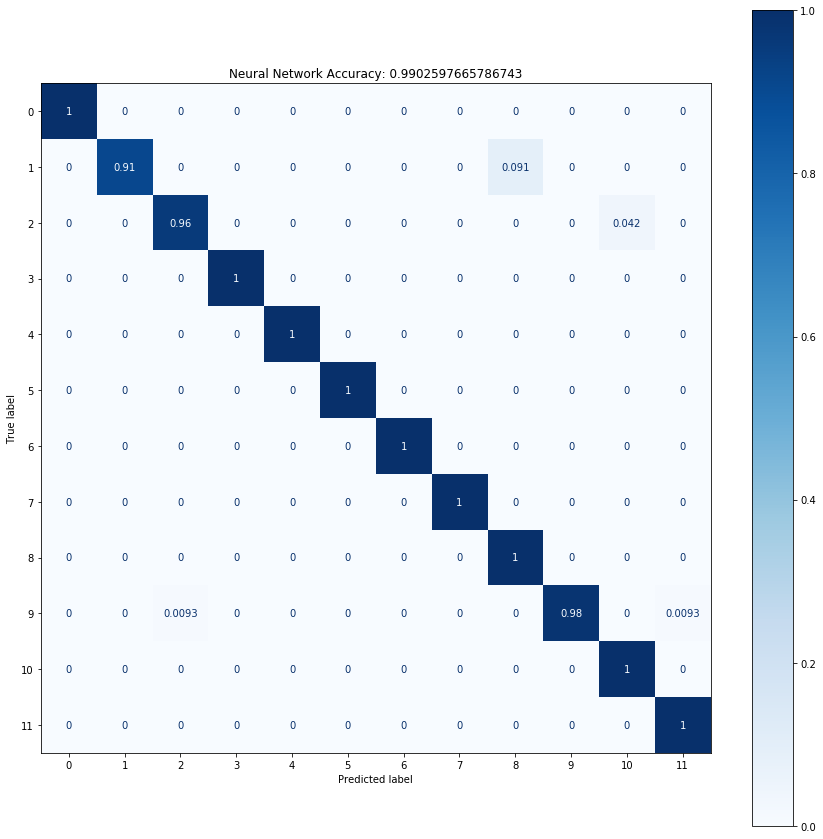

In [299]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def plot_my_cm(true, pred):

    fig = plt.figure(figsize=(15, 15))
    ax = plt.gca()
    cm = confusion_matrix(true, pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(12)])
    disp = disp.plot(cmap=plt.cm.Blues, ax=ax)
    disp.ax_.set_title('Neural Network Accuracy: {}'.format(acc[-1]))

plot_my_cm(model.predict(valid_reduced).argmax(axis=1), y_validation)


In [309]:
# using tensorboard --logdir=path/to/logdir then ctrl+C to kill it in cmd
# SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam
# I tested all of the optimizers above, SGD gave the highest accuracy

input_size = train_reduced.shape[1]
output_size =  max(y_training) + 1

dense_size = 1 + (input_size + output_size) // 2

model = Sequential()
model.add(Dense(dense_size,input_dim=input_size))
model.add(BatchNormalization())
model.add(PReLU(alpha_initializer='zero', weights=None, name = 'PReLU1'))

#model.add(Dropout(0.5))
model.add(Dense(dense_size // 2))
model.add(PReLU(alpha_initializer='zero', weights=None, name = 'PReLU2'))

model.add(Dense(dense_size // 2))
model.add(PReLU(alpha_initializer='zero', weights=None, name = 'PReLU3'))

#model.add(Dropout(0.5))
model.add(Dense(output_size, activation='softmax'))



optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=1e-03, amsgrad=True,
        name='Adam')

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


In [310]:
history = model.fit(train_reduced, y_training_nn, batch_size=32, epochs=100, validation_data = (valid_reduced, y_validation_nn))


Train on 1252 samples, validate on 308 samples
Epoch 1/100
1252/1252 [==============================] - 1s 857us/sample - loss: 3.0296 - accuracy: 0.6214 - val_loss: 4.8943 - val_accuracy: 0.7760
Epoch 2/100
1252/1252 [==============================] - 0s 190us/sample - loss: 1.2660 - accuracy: 0.8171 - val_loss: 9.7164 - val_accuracy: 0.5974
Epoch 3/100
1252/1252 [==============================] - 0s 207us/sample - loss: 2.4424 - accuracy: 0.8323 - val_loss: 14.1496 - val_accuracy: 0.8409
Epoch 4/100
1252/1252 [==============================] - 0s 193us/sample - loss: 22.8505 - accuracy: 0.8866 - val_loss: 257.1548 - val_accuracy: 0.8149
Epoch 5/100
1252/1252 [==============================] - 0s 184us/sample - loss: 101.9651 - accuracy: 0.9073 - val_loss: 511.0065 - val_accuracy: 0.8149
Epoch 6/100
1252/1252 [==============================] - 0s 187us/sample - loss: 111.9509 - accuracy: 0.9433 - val_loss: 693.7120 - val_accuracy: 0.8929
Epoch 7/100
1252/1252 [========================